In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data=sns.load_dataset("iris")

In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

sepal_length       Axes(0.125,0.11;0.168478x0.77)
sepal_width     Axes(0.327174,0.11;0.168478x0.77)
petal_length    Axes(0.529348,0.11;0.168478x0.77)
petal_width     Axes(0.731522,0.11;0.168478x0.77)
dtype: object

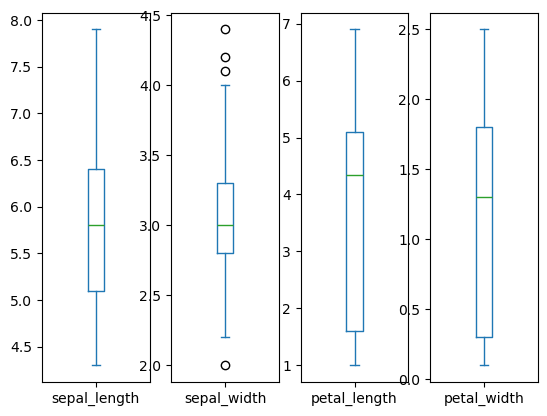

In [9]:
data[['sepal_length','sepal_width','petal_length','petal_width']].plot(kind='box', subplots=True)

In [10]:
data['species'].value_counts(normalize=True)

species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x,xt,y,yt=train_test_split(data.drop(columns="species"),
                           data.species,
                          random_state=42,
                          test_size=0.1,
                          stratify=data.species)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf=RandomForestClassifier()

In [15]:
rf.fit(x,y)

RandomForestClassifier()

In [16]:
rf.score(xt, yt)

0.8666666666666667

In [17]:
rf.score(x, y)

1.0

By Prediction

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
yt_hat=rf.predict(xt)

In [20]:
accuracy_score(y_true=yt, y_pred=yt_hat, normalize=True)

0.8666666666666667

In [21]:
rf.feature_importances_

array([0.09762596, 0.02544713, 0.39568352, 0.48124338])

<Axes: >

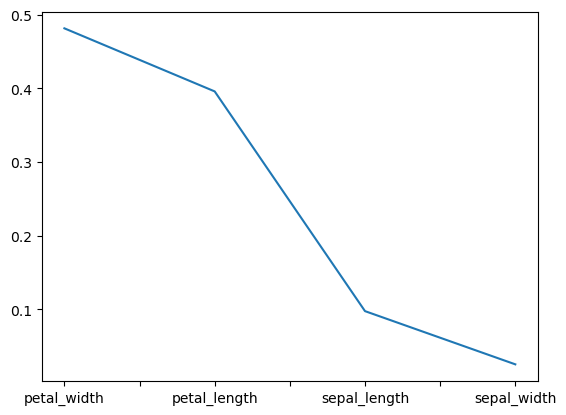

In [22]:
pd.Series(rf.feature_importances_, index=x.columns).nlargest(10).plot()

In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import LogisticRegression  # BINARY CLASSIFIER

dt = DecisionTreeClassifier()
nb = GaussianNB()
svc = SVC()
knn = KNeighborsClassifier()
#lr = LogisticRegression(max_iter=1000)


In [24]:
model = [("Decision Tree", dt), 
         ("Naive_bayes", nb), 
         ("K_Neighbors", knn), 
         ("Support_Vector", svc)]

vc = VotingClassifier(model)


In [25]:
vc.fit(x, y)

VotingClassifier(estimators=[('Decision Tree', DecisionTreeClassifier()),
                             ('Naive_bayes', GaussianNB()),
                             ('K_Neighbors', KNeighborsClassifier()),
                             ('Support_Vector', SVC())])

In [26]:
vc.score(xt, yt)

0.8666666666666667

In [27]:
vc.estimators_

[DecisionTreeClassifier(), GaussianNB(), KNeighborsClassifier(), SVC()]

In [28]:

svc = SVC(probability=True)
model = [("Decision Tree", dt), 
         ("Naive_bayes", nb), 
         ("K_Neighbors", knn), 
         ("Support_Vector", svc)]

vc_soft = VotingClassifier(model, voting='soft')
vc_soft.fit(x, y)
vc_soft.score(xt,yt)


0.9333333333333333

# Boosting

In [29]:
from xgboost import XGBClassifier

In [30]:
xgb=XGBClassifier()

In [31]:
y_num=y.replace({'setosa':0, 'versicolor':1, 'virginica':2})

C:\Users\Ankur Goyal\AppData\Local\Temp\ipykernel_23356\2599769108.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_num=y.replace({'setosa':0, 'versicolor':1, 'virginica':2})


In [32]:
xgb.fit(x,y_num)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [33]:
yt_num=yt.replace({'setosa':0, 'versicolor':1, 'virginica':2})

C:\Users\Ankur Goyal\AppData\Local\Temp\ipykernel_23356\2887744762.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  yt_num=yt.replace({'setosa':0, 'versicolor':1, 'virginica':2})


In [34]:
xgb.score(xt,yt_num)

0.9333333333333333

In [35]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [36]:
ada=AdaBoostClassifier()

In [37]:
ada.fit(x,y)

i:\Software\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [38]:
ada.score(x,y)

0.9703703703703703

In [39]:
ada.score(xt,yt)

0.8666666666666667

In [40]:
gb=GradientBoostingClassifier(max_depth=7)

In [41]:
gb.fit(x,y)

GradientBoostingClassifier(max_depth=7)

In [42]:
gb.score(x,y)

1.0

In [43]:
gb.score(xt,yt)

0.9333333333333333

In [44]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [53]:
data=sns.load_dataset('flights')

In [55]:
data.head(200)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [56]:
import imblearn

In [58]:
print(imblearn.__version__)

0.12.3


In [ ]:
import pandas as pd
import numpy as np
import imblearn  # conda install -c conda-forge imbalanced-learn
import seaborn as sns
from sklearn.datasets import make_classification  # generates data for u
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler